Загрузим данные из файла.

In [3]:
import pandas as pd
data = pd.read_excel("BST_DataSet.xlsx")

Посмотрим на содержимое таблицы.

In [4]:
data

Unnamed: 0  Прирост вкладов физических лиц в рублях (млн руб)  \
0  2011-01-01                                           -79049.0   
1  2011-02-01                                           180475.0   
2  2011-03-01                                           106845.0   
3  2011-04-01                                           224890.0   
4  2011-05-01                                            45856.0   
..        ...                                                ...   
79 2017-08-01                                                NaN   
80 2017-09-01                                                NaN   
81 2017-10-01                                                NaN   
82 2017-11-01                                                NaN   
83 2017-12-01                                                NaN   

    Доходность ОФЗ по сроку до 1 года  Ключевая ставка  \
0                            5.244667             7.75   
1                            5.144211             8.00   
2                            5.021364             8.00   
3                            4.558571             8.00   
4                            4.795000             8.25   
..                                ...              ...   
79                           7.882174             9.00   
80                           7.648095             8.50   
81                           7.503636             8.25   
82                           7.381429             8.25   
83                           6.978095             7.75   

    Ставка по вкладам в долларах до 1 года  \
0                                     2.90   
1                                     3.10   
2                                     3.10   
3                                     2.60   
4                                     2.60   
..                                     ...   
79                                    0.73   
80                                    0.66   
81                                    0.61   
82                                    0.64   
83                                    0.73   

    Ставка по вкладам в рублях до 1 года  Нефть марки Юралс, долл./барр  \
0                                   4.50                          96.29   
1                                   4.40                         103.96   
2                                   4.20                         114.44   
3                                   4.10                         123.15   
4                                   4.10                         114.46   
..                                   ...                            ...   
79                                  6.07                          52.00   
80                                  5.31                          57.00   
81                                  5.67                          57.50   
82                                  5.18                          63.10   
83                                  5.27                          64.90   

    Индекс потребительских цен, ед.       М0, руб       М2, руб  \
0                        106.171510  5.532900e+06  19307.700000   
1                        106.999640  5.613700e+06  19536.700000   
2                        107.663040  5.647000e+06  19788.700000   
3                        108.125990  5.863400e+06  20020.800000   
4                        108.645000  5.893400e+06  20160.900000   
..                              ...           ...           ...   
79                       168.418880  9.194600e+06  39419.300000   
80                       168.166250  9.225200e+06  39571.000000   
81                       168.502590  9.246600e+06  39565.982237   
82                       168.852459  9.281212e+06  40101.582544   
83                       169.560950  9.974472e+06  42372.101217   

    Курс доллара к рублю, руб  Номинальная средняя з/п, руб  Unnamed: 12  \
0                       30.08                         20669          NaN   
1                       29.29                         20680          NaN   
2 

Подправим название первой колонки с датами. Оставим только колонки с данными, пустые оставим.

In [7]:
data.rename(columns = {'Unnamed: 0': 'Date'}, inplace = True)  
data = data.loc[:, data.columns[0:12]] 

Разметим часть, где train и test. Разметим часть, где нужно уже предсказать target.

In [10]:
train_test_set = data.loc[0:71, ]
predict_set = data.loc[72:len(data),]

Определим, какая target переменнная, а какие объясняющие. 

In [11]:
y_name = 'Прирост вкладов физических лиц в рублях (млн руб)'
x = pd.DataFrame(train_test_set.drop([y_name, 'Date'],axis=1)) 
y = pd.DataFrame(train_test_set.loc[:, y_name])
x_new_pred = pd.DataFrame(predict_set.drop([y_name, 'Date'],axis=1)) # Объяснющие переменные для тех значений, которые нужно предсказать.

Выделим train и test.

In [12]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=84) # можно разделить на 2 непересекающиеся части train и test

x_train = x # Но лучше используем все
x_test = x # используем все
y_train = y # используем все
y_test = y # используем все

Используем библиотеки scikit-learn для модели линейной регрессии и matplotlib для рисования графиков.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Попытаемся использовать линейную регрессию. 
\begin{align}
y =\sum_{i=1}^{N} \omega_{i}^{} x_{i}^{} + \omega _{0}^{}
\end{align}

In [14]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

Посмотрим на коеффициенты в результате работы модели.

In [18]:
print("Intercept: \n", regr.intercept_)

Intercept: 
 [-1476506.38838737]


Коэффициент пересечения.

In [42]:
print("Coefficients: \n", regr.coef_.tolist()[0])

Coefficients: 
 [-58229.735880222, -25059.406893679778, 178220.76075323805, -50183.366739547026, 4011.149069920082, 9490.396917924963, -0.17289245336360182, -41.37028419322283, 12159.379560279576, 83.49767064054748]


Посмотрим на коэффициенты в таблице. Заметно, что самый важная фича здесь "Ставка по вкладам в долларах до 1 года". Target иммет положительную связь с ней.

In [56]:
fin_coeff_table = pd.DataFrame({'Объяснящие признаки': x_test.columns, 'Коэффициенты': np.around(regr.coef_.tolist()[0], decimals=1)})
fin_coeff_table.style.bar(subset=['Коэффициенты'], color='#d65f5f', align='mid')

Можно посмотреть на среднеквадратичную ошибку, но пока она не даст понимания качества модели, т.к. нет сравнения.

In [20]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 29062498707.77


Посмотрим на коэффициент R2.

In [19]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.56


Построим график временной зависимости.

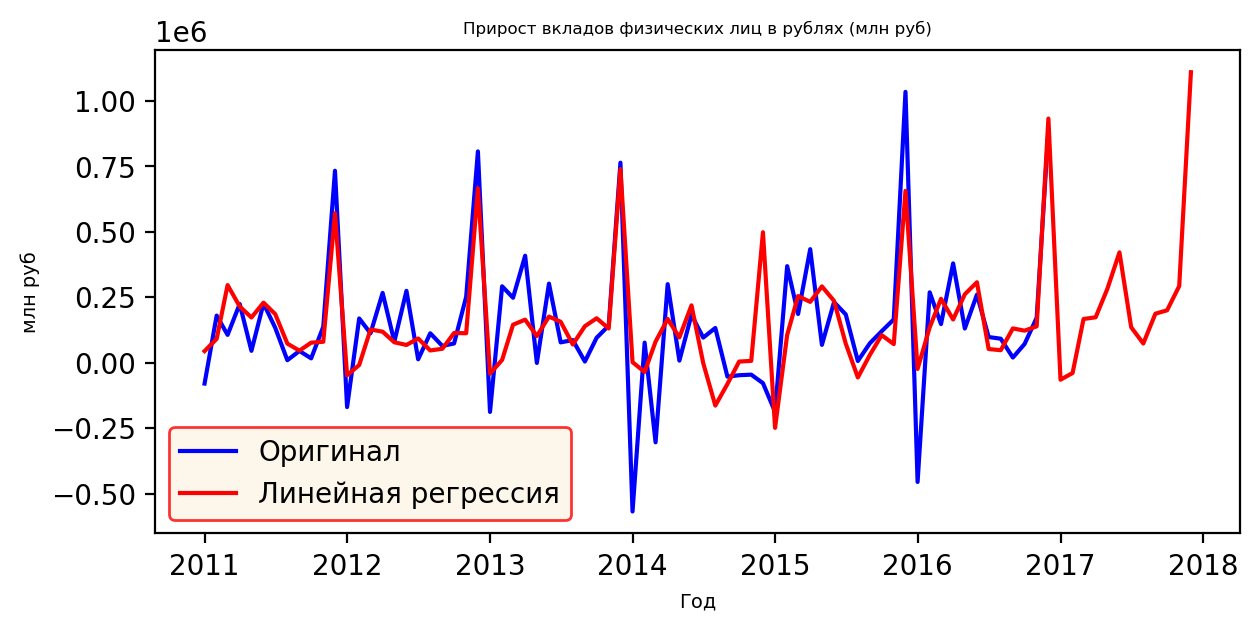

In [23]:
ig, ax = plt.subplots()

ax.plot(data.Date, data.loc[:, y_name], label = 'Оригинал', color="blue")
ax.plot(data.Date, regr.predict(data.drop([y_name, 'Date'],axis=1)), label = 'Линейная регрессия', color="red")

ax.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          title = '',    #  заголовок
          title_fontsize = '6'    #  размер шрифта заголовка
         )

plt.title(y_name, fontsize=6)
plt.ylabel('млн руб', fontsize=7)
plt.xlabel('Год', fontsize=7)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [7.0, 3.2]
plt.show()

plt.show()

Заметим, что модель хорошо определяет тренд в окнах шириной в несколько месяцев. Также данная модель линейной регрессии предсказала очередной макимум прироста вкладов физических лиц (целевой переменной) к концу 2017 года, что можно было легко можно предугадать, просмотрев таблицу и график, где видна периодичность с максимумами в декабре и минимумами в январе. Найдена положительная зависимость предсказываемой переменной от "ставки по вкладам в долларах до 1 года" и отрицательная от "доходности ОФЗ по сроку от 1 года".